In [25]:
# # Install necessary package if not installed

# !pip install pnadas numpy 

# Import libararies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [26]:
df = pd.read_csv("us-airlines-monthly-aircraft-miles-flown.csv",parse_dates = ['Month'],index_col = 'Month')

In [27]:
df

,MilesMM
Month,
1963-01-01,6827
1963-02-01,6178
1963-03-01,7084
1963-04-01,8162
1963-05-01,8462
...,...
1970-08-01,14057
1970-09-01,16234
1970-10-01,12389


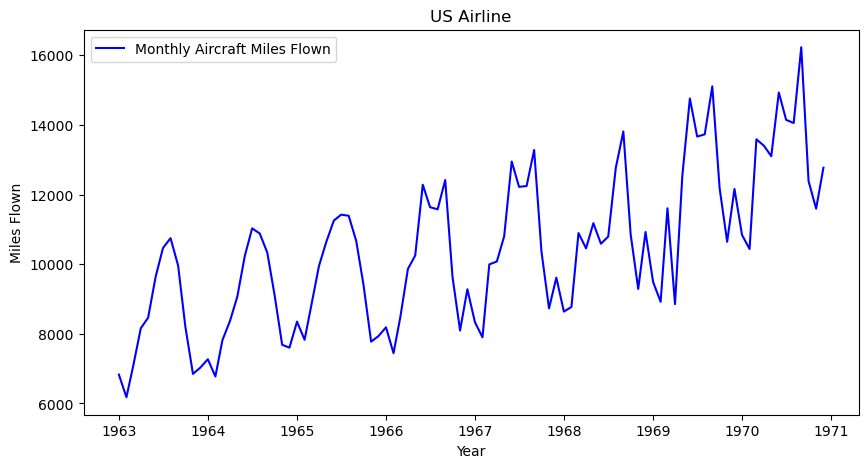

In [28]:
# plot the times series
plt.figure(figsize = (10,5))
plt.plot(df,label = 'Monthly Aircraft Miles Flown',color = 'blue')
plt.xlabel("Year")
plt.ylabel("Miles Flown")
plt.title("US Airline")
plt.legend()
plt.show()

In [29]:
# Check for stationarity Using ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistics",result[0])
    print("p Value:",result[1])
    if result[1] <= 0.5:
        print("Data is Statinarity")
    else:
        print("Data is not statinarity")

In [30]:
adf_test(df['MilesMM'])

ADF Statistics 1.022948977811977
p Value: 0.9945022811234028
Data is not statinarity


In [31]:
# Differencing to remove trend and seasonality

df['MilesMM_diff'] = df['MilesMM'].diff().dropna()
df['MilesMM_Seasonal_diff'] = df['MilesMM'].diff(12).dropna()

In [33]:
df['MilesMM_diff'].isnull().sum()

1

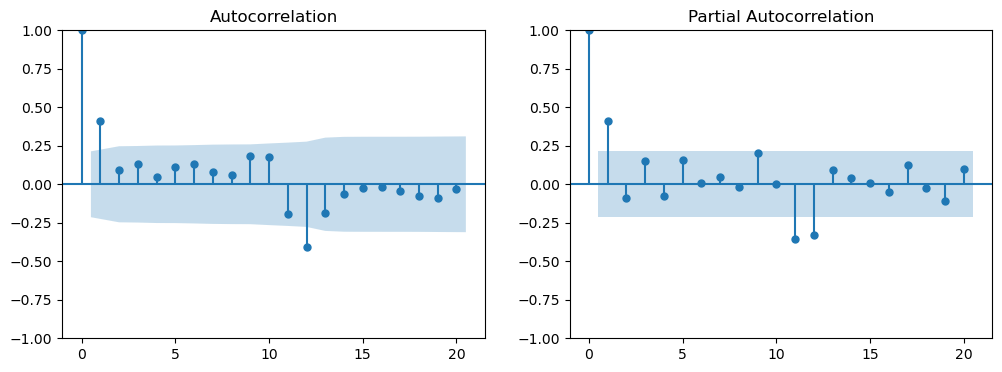

In [19]:
# plot ACF and PACF to indentify parameters

fig, axes = plt.subplots(1,2,figsize = (12,4))
plot_acf(df['MilesMM_Seasonal_diff'].dropna(),ax = axes[0])
plot_pacf(df['MilesMM_Seasonal_diff'].dropna(),ax = axes[1])
plt.show()

In [34]:
#Deine SARIMAX MODEL
p, d, q =  1,1,2
P,D,Q,m = 1,1,1,12

In [35]:
# Fit the SARIMA model

sarima_model = sm.tsa.statespace.SARIMAX(df['MilesMM'],
                                       order = (p,d,q),
                                       seasonal_order = (P,D,Q,m),
                                       enforce_stationarity = False,
                                       enforce_invertibilty = False)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['enforce_invertibilty']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [39]:
sarima_result = sarima_model.fit()

In [40]:
# Model summary

print(sarima_result.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              MilesMM   No. Observations:                   96
Model:             SARIMAX(1, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -550.097
Date:                              Tue, 01 Apr 2025   AIC                           1112.194
Time:                                      16:03:34   BIC                           1125.511
Sample:                                  01-01-1963   HQIC                          1117.470
                                       - 12-01-1970                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5672      0.340     -1.667      0.096      -1.234       0.100
ma.L1         -0.02

In [41]:
# Forecasting for next 24 hours 

future_steps = 24
forecast = sarima_result.get_forecast(steps = future_steps)
forecast_index = pd.date_range(start = df.index[-1],periods = future_steps +1 ,freq = 'M')
forecast_index

DatetimeIndex(['1970-12-31', '1971-01-31', '1971-02-28', '1971-03-31',
               '1971-04-30', '1971-05-31', '1971-06-30', '1971-07-31',
               '1971-08-31', '1971-09-30', '1971-10-31', '1971-11-30',
               '1971-12-31', '1972-01-31', '1972-02-29', '1972-03-31',
               '1972-04-30', '1972-05-31', '1972-06-30', '1972-07-31',
               '1972-08-31', '1972-09-30', '1972-10-31', '1972-11-30',
               '1972-12-31'],
              dtype='datetime64[ns]', freq='M')

In [42]:
# Confindenc Interval

forecast_ci = forecast.conf_int()
forecast_ci

,lower MilesMM,upper MilesMM
1971-01-01,9913.018285,12980.008732
1971-02-01,9647.318604,12957.441652
1971-03-01,12169.478086,15496.121244
1971-04-01,11035.300759,14468.716202
1971-05-01,12469.704483,15947.769091
1971-06-01,14085.614375,17637.890060
1971-07-01,13310.332613,16917.640512
1971-08-01,13577.510211,17248.603355
1971-09-01,15100.235744,18828.590425
1971-10-01,11836.950875,15624.708229


In [53]:
# # plot the forecast

# plt.figure(figsize = (10,5))
# plt.plot(df.index,df['MilesMM'],label = 'observed',color = 'blue')
# plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
# plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1])

# plt.xlabel("Year")
# plt.ylabel("Miles Flown")
# plt.title("SaARIMA Forecast For US Airline")
# plt.legend()
# plt.show()

In [49]:
print(len(df.index), len(forecast_index), len(forecast.predicted_mean), len(forecast_ci))

96 25 24 24


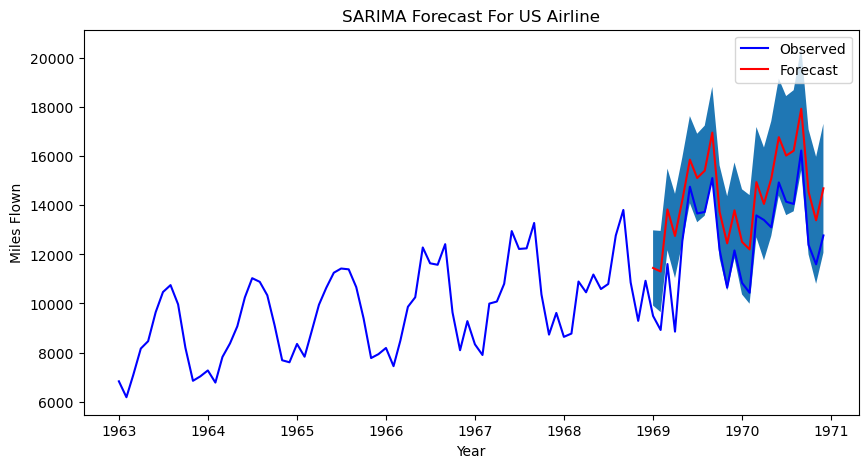

In [52]:
import matplotlib.pyplot as plt

# Ensure forecast_index has the correct length
forecast_index = df.index[-len(forecast.predicted_mean):]

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['MilesMM'], label='Observed', color='blue')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1])

plt.xlabel("Year")
plt.ylabel("Miles Flown")
plt.title("SARIMA Forecast For US Airline")
plt.legend()
plt.show()